# Extra Credit Project
### By Hao Xi, hx517
### Proposal is here
### https://www.authorea.com/215242/TNZEMJ9q8CgQ5rjc_CijCg

In [363]:
import os
import sys
import numpy as np
import pandas as pd
import time,datetime
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt 
from sklearn import preprocessing
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn import linear_model

## 1. download data to PUIDATA

In [23]:
os.environ['PUIDATA']='/wingrdp/homedirs/hx517/PUIdata'
# http://aurorawu.lofter.com/post/18f005_6fd653 
# follow this
# set puidata env everytimes.

In [24]:
os.environ['PUIDATA']

'/wingrdp/homedirs/hx517/PUIdata'

In [25]:
os.getenv('PUIDATA')

'/wingrdp/homedirs/hx517/PUIdata'

In [26]:
def download(datestring):
    #getCitiBikeCSV(datestring)
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
    ###  To move it I use the os.system() functions to run bash commands with arguments
    os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
    ### unzip the csv 
    os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata..csvzip")

In [224]:
download('201704')

In [339]:
cb = pd.read_csv(os.getenv("PUIDATA") + "/201704-citibike-tripdata.csv.zip")

In [340]:
cb.shape

(1315404, 15)

In [341]:
cb.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [342]:
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2


In [286]:
weather = pd.read_csv(os.getenv("PUIDATA") + "/2017_weather.csv")

In [287]:
weather.head()

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill
0,0,Overcast,"Jan. 01, 2017",25.0 °F,NaN,-,NaN,47%,NaN,29.89 in,44.1 °F,NaN,12:51 AM,10.0 mi,Variable,3.5 mph,42.5 °F
1,1,Overcast,"Jan. 01, 2017",26.1 °F,NaN,23.0 mph,NaN,49%,0.00 in,29.90 in,44.1 °F,NaN,1:51 AM,10.0 mi,West,4.6 mph,41.5 °F
2,2,Overcast,"Jan. 01, 2017",25.0 °F,NaN,-,NaN,46%,NaN,29.91 in,45.0 °F,NaN,2:51 AM,10.0 mi,North,-,-
3,3,Partly Cloudy,"Jan. 01, 2017",25.0 °F,NaN,18.4 mph,NaN,47%,NaN,29.93 in,44.1 °F,NaN,3:51 AM,10.0 mi,WSW,10.4 mph,38.6 °F
4,4,Mostly Cloudy,"Jan. 01, 2017",24.1 °F,NaN,-,NaN,44%,NaN,29.94 in,45.0 °F,NaN,4:51 AM,10.0 mi,WSW,6.9 mph,41.2 °F


In [288]:
weather['Time (EDT)']=weather['Time (EDT)'].fillna('')
weather['Time (EST)']=weather['Time (EST)'].fillna('')
weather['Time']=weather['Time (EDT)']+weather['Time (EST)']

In [289]:
weather=weather[['Conditions','Date','Temp.','Time','Visibility','Wind Speed','Humidity']]

In [290]:
weather['vis']=pd.to_numeric(weather['Visibility'].astype(str).str[:-3],errors='coerce')      # make columns numeric
weather['Temp.']=pd.to_numeric(weather['Temp.'].astype(str).str[:-3],errors='coerce')
weather['wind_speed']=pd.to_numeric(weather['Wind Speed'].astype(str).str[:-4],errors='coerce')
weather['humidity']=pd.to_numeric(weather['Humidity'].astype(str).str[:-1],errors='coerce')

weather.head(5)

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity
0,Overcast,"Jan. 01, 2017",44.1 °F,12:51 AM,10.0 mi,3.5 mph,47%,NaN,NaN,NaN,47.0
1,Overcast,"Jan. 01, 2017",44.1 °F,1:51 AM,10.0 mi,4.6 mph,49%,NaN,NaN,NaN,49.0
2,Overcast,"Jan. 01, 2017",45.0 °F,2:51 AM,10.0 mi,-,46%,NaN,NaN,NaN,46.0
3,Partly Cloudy,"Jan. 01, 2017",44.1 °F,3:51 AM,10.0 mi,10.4 mph,47%,NaN,NaN,NaN,47.0
4,Mostly Cloudy,"Jan. 01, 2017",45.0 °F,4:51 AM,10.0 mi,6.9 mph,44%,NaN,NaN,NaN,44.0


In [291]:
weather['datetime'] = weather["Date"].map(str) + " " + weather["Time"]         # create one-hour datetime column
weather['datetime'] = pd.to_datetime(weather['datetime'])

In [292]:
#weather.assign(rounded_dt=weather.datetime.dt.round('H'))
weather['datetime']=pd.to_datetime(weather.datetime.dt.date) + pd.to_timedelta(weather.datetime.dt.hour, unit='H')
weather.head()

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity,datetime
0,Overcast,"Jan. 01, 2017",44.1 °F,12:51 AM,10.0 mi,3.5 mph,47%,NaN,NaN,NaN,47.0,2017-01-01 00:00:00
1,Overcast,"Jan. 01, 2017",44.1 °F,1:51 AM,10.0 mi,4.6 mph,49%,NaN,NaN,NaN,49.0,2017-01-01 01:00:00
2,Overcast,"Jan. 01, 2017",45.0 °F,2:51 AM,10.0 mi,-,46%,NaN,NaN,NaN,46.0,2017-01-01 02:00:00
3,Partly Cloudy,"Jan. 01, 2017",44.1 °F,3:51 AM,10.0 mi,10.4 mph,47%,NaN,NaN,NaN,47.0,2017-01-01 03:00:00
4,Mostly Cloudy,"Jan. 01, 2017",45.0 °F,4:51 AM,10.0 mi,6.9 mph,44%,NaN,NaN,NaN,44.0,2017-01-01 04:00:00


In [293]:
weather.isnull().sum()

Conditions       0
Date             0
Temp.            0
Time             0
Visibility       0
Wind Speed       0
Humidity         0
vis           5531
temp          5531
wind_speed    5531
humidity         3
datetime         0
dtype: int64

In [294]:
start='2017-04-01 00:00:00'
end='2017-04-30 23:00:00'

mask = (weather['datetime'] > start) & (weather['datetime'] <= end)

w9 = weather.loc[mask]


print("Shape: ",w9.shape)
w9.head()

('Shape: ', (916, 12))


,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity,datetime
2733,Overcast,"Apr. 01, 2017",37.9 °F,1:51 AM,5.0 mi,12.7 mph,93%,NaN,NaN,NaN,93.0,2017-04-01 01:00:00
2734,Overcast,"Apr. 01, 2017",37.0 °F,2:51 AM,6.0 mi,13.8 mph,96%,NaN,NaN,NaN,96.0,2017-04-01 02:00:00
2735,Overcast,"Apr. 01, 2017",37.0 °F,3:31 AM,2.5 mi,15.0 mph,96%,NaN,NaN,NaN,96.0,2017-04-01 03:00:00
2736,Overcast,"Apr. 01, 2017",37.0 °F,3:38 AM,3.0 mi,16.1 mph,96%,NaN,NaN,NaN,96.0,2017-04-01 03:00:00
2737,Overcast,"Apr. 01, 2017",37.0 °F,3:51 AM,3.0 mi,6.9 mph,96%,NaN,NaN,NaN,96.0,2017-04-01 03:00:00


## 2. descriptive analysis

Weather data

In [295]:
weather_dummy = pd.get_dummies(w9.Conditions,prefix = '',prefix_sep='')
w9 = w9.merge(weather_dummy, right_index = True, left_index  = True, how = 'outer')
w9.describe()    
# Note last column if 'unknown' which is 1 for just five rows

,vis,temp,wind_speed,humidity,Clear,Haze,Heavy Rain,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Unknown
count,0.0,0.0,0.0,915.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,NaN,NaN,NaN,68.744262,0.346070,0.010917,0.008734,0.077511,0.061135,0.413755,0.032751,0.025109,0.022926,0.001092
std,NaN,NaN,NaN,24.449747,0.475976,0.103969,0.093096,0.267546,0.239709,0.492775,0.178082,0.156542,0.149749,0.033041
min,NaN,NaN,NaN,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,NaN,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [296]:
w9.head()

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,...,Clear,Haze,Heavy Rain,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Unknown
2733,Overcast,"Apr. 01, 2017",37.9 °F,1:51 AM,5.0 mi,12.7 mph,93%,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2734,Overcast,"Apr. 01, 2017",37.0 °F,2:51 AM,6.0 mi,13.8 mph,96%,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2735,Overcast,"Apr. 01, 2017",37.0 °F,3:31 AM,2.5 mi,15.0 mph,96%,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2736,Overcast,"Apr. 01, 2017",37.0 °F,3:38 AM,3.0 mi,16.1 mph,96%,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2737,Overcast,"Apr. 01, 2017",37.0 °F,3:51 AM,3.0 mi,6.9 mph,96%,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


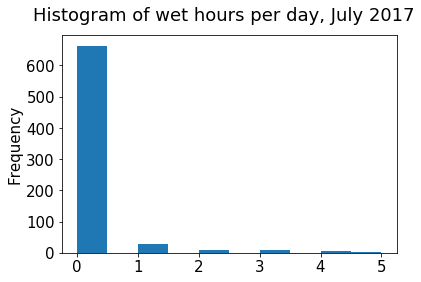

In [297]:
w9['Wet_hours']=w9['Heavy Rain']+w9['Rain']+w9['Light Rain']
w9.groupby(['datetime'])['Wet_hours'].sum().plot.hist()
plt.suptitle('Histogram of wet hours per day, July 2017')

## 3.methodology

calculate speed

In [343]:
#通过经纬度计算距离的函数
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）  
    """ 
    Calculate the great circle distance between two points  
    on the earth (specified in decimal degrees) 
    """  
    # 将十进制度数转化为弧度  
    lon1= map(radians, np.array(lon1))  
    lat1= map(radians, np.array(lat1))
    lon2= map(radians, np.array(lon2))
    lat2= map(radians, np.array(lat2))
    lon1 = np.array(list(lon1)).reshape(-1,1)
    lon2 = np.array(list(lon2)).reshape(-1,1)
    lat1 = np.array(list(lat1)).reshape(-1,1)
    lat2 = np.array(list(lat2)).reshape(-1,1)
    # haversine公式  
    dlon = lon2 - lon1
    dlat = lat2 - lat1 

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2  
    c = 2 * np.arcsin(np.sqrt(a))   
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000  

#计算每次骑行的米数并增加骑行距离字段
cb["meter"]=haversine(cb["start station longitude"],cb["start station latitude"],cb["end station longitude"],cb["end station latitude"])

#将原数据表中的骑行时间由秒转化为小时
cb["duration_hour"]=cb["tripduration"]/3600
#将米转化为公里并与小时计算出速度
cb["speed"]=cb["meter"]/1000/cb["duration_hour"]

In [345]:
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,meter,duration_hour,speed
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1,629.055437,0.054167,11.613331
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1,2428.585524,0.162500,14.945142
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1,2109.137769,0.184722,11.417889
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1,695.769460,0.072778,9.560191
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2,522.978063,0.037222,14.050157


weather in september

In [308]:
weather.columns

Index([u'Conditions', u'Date', u'Temp.', u'Time', u'Visibility', u'Wind Speed',
       u'Humidity', u'vis', u'temp', u'wind_speed', u'humidity', u'datetime'],
      dtype='object')

In [349]:
cb['timebyhour'] = pd.to_datetime(cb['starttime'])

In [350]:
cb.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'meter', u'duration_hour',
       u'speed', u'timebyhour'],
      dtype='object')

In [352]:
cb['timebyhour']=pd.to_datetime(cb.timebyhour.dt.date) + pd.to_timedelta(cb.timebyhour.dt.hour, unit='H')

In [353]:
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,meter,duration_hour,speed,timebyhour
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1,629.055437,0.054167,11.613331,2017-04-01
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1,2428.585524,0.162500,14.945142,2017-04-01
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1,2109.137769,0.184722,11.417889,2017-04-01
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1,695.769460,0.072778,9.560191,2017-04-01
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2,522.978063,0.037222,14.050157,2017-04-01


In [357]:
cb.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'meter', u'duration_hour'], axis=1,inplace=True)

ValueError: labels [u'tripduration' u'starttime' u'stoptime' u'start station id'
 u'start station name' u'start station latitude' u'start station longitude'
 u'end station id' u'end station name' u'end station latitude'
 u'end station longitude' u'bikeid' u'usertype' u'birth year' u'gender'
 u'meter' u'duration_hour'] not contained in axis

In [358]:
cb.head()

,speed,timebyhour
0,11.613331,2017-04-01
1,14.945142,2017-04-01
2,11.417889,2017-04-01
3,9.560191,2017-04-01
4,14.050157,2017-04-01


In [360]:
w9.head()

0    44.1 °F
1    44.1 °F
2    45.0 °F
3    44.1 °F
4    45.0 °F
Name: Temp., dtype: object

In [361]:
X = np.array(w9)
Y = np.array(cb[['speed']])

In [364]:
clf = linear_model.LinearRegression()
clf.fit (X,Y)

ValueError: invalid literal for float(): 73.0 °F

In [365]:
clf.score(X,Y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.